# CSCI 575 Final Project: Real/AI-Generated Image Classifier

Imports/Setup

In [3]:
import matplotlib.pyplot as plt
import numpy
import tensorflow
import time

numpy.random.seed(0)
tensorflow.random.set_seed(0)
%matplotlib inline
verbose = 2 # 0==no output, 1==accuracy/loss output, 2==progress bar output

Create helper function to plot results of our model training

In [4]:
def plot_results(history):
    epoch_num = numpy.arange(1, len(history.history['loss'])+1)

    plt.figure(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epoch_num, history.history['loss'], label='training_loss')
    plt.plot(epoch_num, history.history['val_loss'], label='test_loss')
    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(epoch_num, history.history['accuracy'], label='training_accuracy')
    plt.plot(epoch_num, history.history['val_accuracy'], label='test_accuracy')
    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.grid(True)

Load the AI/Real Images data

In [5]:
# Load data
(images_train, labels_train), (images_test, labels_test) = mnist.load_data()

# Use a subset of the full training and test sets for actual training and testing,
# to accelerate training, and demonstrate possible pitfalls of smaller training data sets.

n_train = 1000
images_train = images_train[0:n_train,:,:]
labels_train = labels_train[0:n_train]

n_test = 1000
images_test = images_test[0:n_test,:,:]
labels_test = labels_test[0:n_train]

NotFoundError: ignored

## We'll show a few of the MNIST digits, to confirm that they look as expected

In [1]:
## You will not need to run this cell more than once, or cut/paste it elsewhere
plt.figure(figsize=(8*2, 2*2))
for i in range(16):
    plt.subplot(2, 8, i+1)
    plt.imshow(images_train[i,:,:], cmap='gray')

NameError: ignored

In [ ]:
# Create TensorFlow Dataset objects to hold train and test data.
images_train = images_train/255
images_train = np.expand_dims(images_train, axis=3) # TensorFlow expects a channel dimension
images_train = tf.cast(images_train, tf.float32)
labels_train = tf.cast(labels_train, tf.float32)
dataset_train = tf.data.Dataset.from_tensor_slices((images_train, labels_train))

images_test = images_test/255
images_test = np.expand_dims(images_test, axis=3) # TensorFlow expects a channel dimension
images_test = tf.cast(images_test, tf.float32)
labels_test = tf.cast(labels_test, tf.float32)
dataset_test = tf.data.Dataset.from_tensor_slices((images_test, labels_test))

batch_size = 50

dataset_train = dataset_train.cache()
dataset_train = dataset_train.shuffle(n_train)
dataset_train = dataset_train.batch(batch_size)
dataset_train = dataset_train.prefetch(tf.data.experimental.AUTOTUNE)

dataset_test = dataset_test.cache()
dataset_test = dataset_test.batch(batch_size)
dataset_test = dataset_test.cache()
dataset_test = dataset_test.prefetch(tf.data.experimental.AUTOTUNE)

## Construct, compile, and train the baseline model.

### Don't edit any code in the cell below.

### Run the cell, and wait for the training to finish. Training may take minute or two.

The code will plot the loss and accuracy scores that were collected during training. Remember that training uses gradient descent, so the model parameters are slowly updated as the model gets a closer and closer fit to the data. TensorFlow records the scores after each "epoch"--the number of iterations at which all samples in the training set have been used once, in the gradient descent process.

Epoch 1/30
20/20 - 2s - loss: 2.1958 - accuracy: 0.2710 - val_loss: 2.0795 - val_accuracy: 0.3310 - 2s/epoch - 112ms/step
Epoch 2/30
20/20 - 1s - loss: 1.8256 - accuracy: 0.4950 - val_loss: 1.5758 - val_accuracy: 0.6170 - 703ms/epoch - 35ms/step
Epoch 3/30
20/20 - 1s - loss: 1.1628 - accuracy: 0.7310 - val_loss: 0.9790 - val_accuracy: 0.7200 - 700ms/epoch - 35ms/step
Epoch 4/30
20/20 - 1s - loss: 0.6917 - accuracy: 0.8090 - val_loss: 0.7255 - val_accuracy: 0.7750 - 820ms/epoch - 41ms/step
Epoch 5/30
20/20 - 1s - loss: 0.5170 - accuracy: 0.8520 - val_loss: 0.5966 - val_accuracy: 0.8190 - 752ms/epoch - 38ms/step
Epoch 6/30
20/20 - 1s - loss: 0.4270 - accuracy: 0.8730 - val_loss: 0.6002 - val_accuracy: 0.8060 - 785ms/epoch - 39ms/step
Epoch 7/30
20/20 - 1s - loss: 0.3836 - accuracy: 0.8890 - val_loss: 0.4828 - val_accuracy: 0.8440 - 680ms/epoch - 34ms/step
Epoch 8/30
20/20 - 1s - loss: 0.3319 - accuracy: 0.9020 - val_loss: 0.4477 - val_accuracy: 0.8540 - 885ms/epoch - 44ms/step
Epoch 9/30

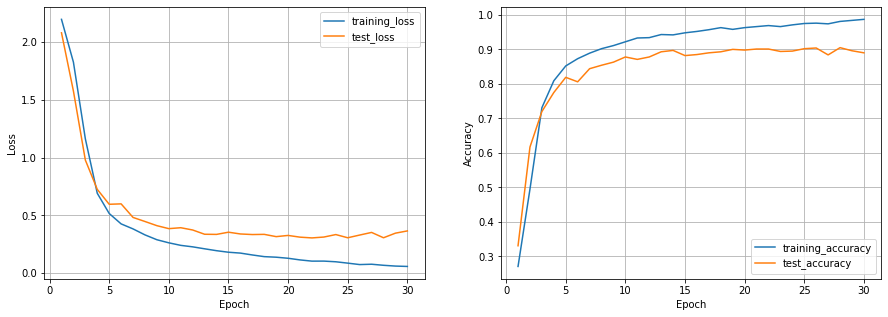

In [ ]:
## This is the baseline model. Only modify it after copying it to cells further below.
num_kernels = 4
dense_layer_neurons = 64
kernels_size = (3, 3)
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(num_kernels, kernels_size, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),

    tf.keras.layers.Conv2D(num_kernels, kernels_size, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(dense_layer_neurons, activation='relu'),
    tf.keras.layers.Dense(10)
])

# Do not change any arguments in the call to model.compile()
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy'],
)

# Do not change any arguments in the call to model.fit()
epochs = 30
t = time.time()
history = model.fit(dataset_train,
                    epochs=epochs,
                    validation_data=dataset_test,
                    verbose=verbose)
print('Training duration: %f seconds.' % (time.time() - t))

# Plot results
plot_results(history)

## MODIFICATION 1 (6 pts)

### Copy code from cell above, that builds and trains the baseline model, and plots the results.
### Now alter the model as described below, and run the code.
Alter the model by removing the ReLU and max-pooling non-linear activations.  
You can do this by
1. setting ```activation=None``` rather than ```activation='relu'``` in the relevant NN layers, and
2. by commenting out or deleting lines of code that define the max-pooling layers.

Epoch 1/30
20/20 - 1s - loss: 1.2052 - accuracy: 0.6390 - val_loss: 0.7833 - val_accuracy: 0.7550 - 969ms/epoch - 48ms/step
Epoch 2/30
20/20 - 0s - loss: 0.4353 - accuracy: 0.8740 - val_loss: 0.5466 - val_accuracy: 0.8240 - 487ms/epoch - 24ms/step
Epoch 3/30
20/20 - 0s - loss: 0.3044 - accuracy: 0.9160 - val_loss: 0.5234 - val_accuracy: 0.8480 - 492ms/epoch - 25ms/step
Epoch 4/30
20/20 - 0s - loss: 0.2171 - accuracy: 0.9440 - val_loss: 0.5261 - val_accuracy: 0.8450 - 483ms/epoch - 24ms/step
Epoch 5/30
20/20 - 0s - loss: 0.1689 - accuracy: 0.9580 - val_loss: 0.5139 - val_accuracy: 0.8460 - 486ms/epoch - 24ms/step
Epoch 6/30
20/20 - 0s - loss: 0.1253 - accuracy: 0.9670 - val_loss: 0.5622 - val_accuracy: 0.8420 - 497ms/epoch - 25ms/step
Epoch 7/30
20/20 - 0s - loss: 0.0883 - accuracy: 0.9830 - val_loss: 0.5814 - val_accuracy: 0.8320 - 491ms/epoch - 25ms/step
Epoch 8/30
20/20 - 1s - loss: 0.0680 - accuracy: 0.9860 - val_loss: 0.6725 - val_accuracy: 0.8210 - 500ms/epoch - 25ms/step
Epoch 9/

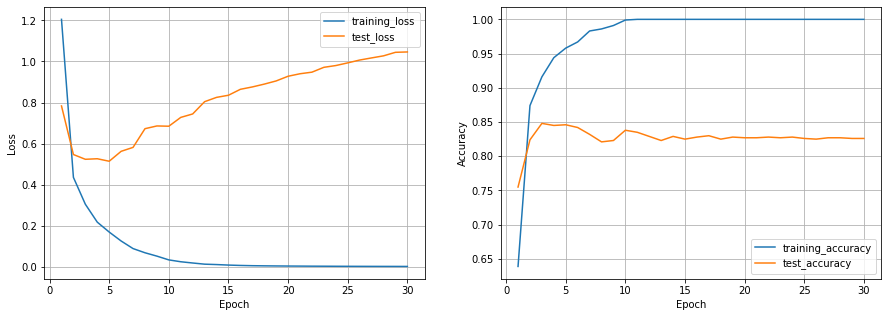

In [ ]:
## MODIFICATION 1
## BELOW, PUT YOUR MODEL CONSTRUCTION, COMPILATION, AND FITTING CODE

## This is the baseline model. Only modify it after copying it to cells further below.
num_kernels = 4
dense_layer_neurons = 64
kernels_size = (3, 3)
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(num_kernels, kernels_size, activation=None),
    # tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),

    tf.keras.layers.Conv2D(num_kernels, kernels_size, activation=None),
    # tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(dense_layer_neurons, activation=None),
    tf.keras.layers.Dense(10)
])

# Do not change any arguments in the call to model.compile()
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy'],
)

# Do not change any arguments in the call to model.fit()
epochs = 30
t = time.time()
history = model.fit(dataset_train,
                    epochs=epochs,
                    validation_data=dataset_test,
                    verbose=verbose)
print('Training duration: %f seconds.' % (time.time() - t))


# Plot results
plot_results(history)

In [ ]:
## MODIFICATION 1
## QUESTION 1: During training, how did the loss (error) curves change from the baseline model to the linear (MOD 1)
##             model, for both the training and test sets? What does this imply regarding underfitting or overfitting?
## QUESTION 2: In general, did the ReLU and max-pooling non-linearities make for a better model or a worse model?


## Answer 1: For linear model, test loss grows as the training loss decreases, which implies overfitting.
## Answer 2: The non-linearities improve model performance.

## MODIFICATION 2 (6 pts)

### Copy code from the baseline model, for building, training, and plotting results.
### Now alter the model as described below, and run the code.

Make the network much larger, by:
1. Increasing the number of kernels in the convolutional layers from 4 to 64 (16x).
2. Increasing the number neurons in the dense layer from 64 to 1024 (16x).

Epoch 1/30
20/20 - 2s - loss: 1.2579 - accuracy: 0.5920 - val_loss: 0.7187 - val_accuracy: 0.7900 - 2s/epoch - 121ms/step
Epoch 2/30
20/20 - 2s - loss: 0.3937 - accuracy: 0.8840 - val_loss: 0.3518 - val_accuracy: 0.8830 - 2s/epoch - 96ms/step
Epoch 3/30
20/20 - 2s - loss: 0.1971 - accuracy: 0.9530 - val_loss: 0.3230 - val_accuracy: 0.9000 - 2s/epoch - 94ms/step
Epoch 4/30
20/20 - 2s - loss: 0.1375 - accuracy: 0.9620 - val_loss: 0.2260 - val_accuracy: 0.9240 - 2s/epoch - 95ms/step
Epoch 5/30
20/20 - 2s - loss: 0.0875 - accuracy: 0.9730 - val_loss: 0.2229 - val_accuracy: 0.9320 - 2s/epoch - 95ms/step
Epoch 6/30
20/20 - 2s - loss: 0.0550 - accuracy: 0.9840 - val_loss: 0.2121 - val_accuracy: 0.9330 - 2s/epoch - 96ms/step
Epoch 7/30
20/20 - 2s - loss: 0.0259 - accuracy: 0.9940 - val_loss: 0.1719 - val_accuracy: 0.9430 - 2s/epoch - 96ms/step
Epoch 8/30
20/20 - 2s - loss: 0.0167 - accuracy: 0.9980 - val_loss: 0.2002 - val_accuracy: 0.9350 - 2s/epoch - 97ms/step
Epoch 9/30
20/20 - 2s - loss: 0

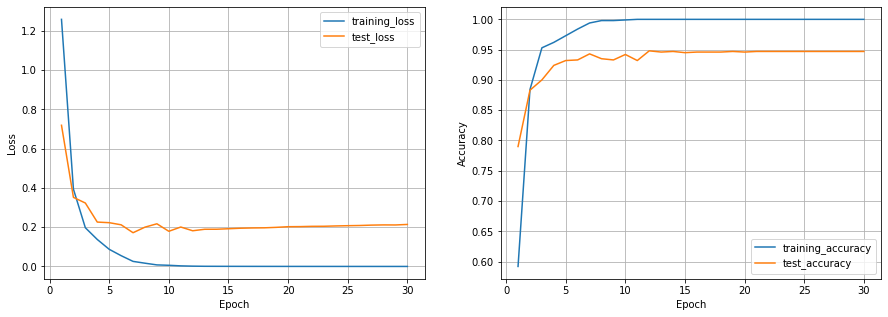

In [ ]:
## MODIFICATION 2
## BELOW, PUT YOUR MODEL CONSTRUCTION, COMPILATION, AND FITTING CODE

num_kernels = 64
dense_layer_neurons = 1024
kernels_size = (3, 3)
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(num_kernels, kernels_size, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),

    tf.keras.layers.Conv2D(num_kernels, kernels_size, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(dense_layer_neurons, activation='relu'),
    tf.keras.layers.Dense(10)
])

# Do not change any arguments in the call to model.compile()
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy'],
)

# Do not change any arguments in the call to model.fit()
epochs = 30
t = time.time()
history = model.fit(dataset_train,
                    epochs=epochs,
                    validation_data=dataset_test,
                    verbose=verbose)
print('Training duration: %f seconds.' % (time.time() - t))

# Plot results
plot_results(history)

In [ ]:
## MODIFICATION 2
## QUESTION 1: How did the performance of the larger model (MOD 2) compare to that of the baseline model?
## QUESTION 2: Based on the training curves, does the larger model show any **clear** signs of overfitting,
##             despite the large number of parameters?

## Answer 1: MOD 2 model performance increased to about 95% accuracy, from the 90% baseline.
## Answer 2: No.

## MODIFICATION 3 (6 pts)

### Copy code from the baseline model, for building, training, and plotting results.
### Now alter the model as described below, and run the code.

**Relative to the MOD 2 model**, remove the convolutional and max-pooling layers, replacing them with a single, new, dense layer.

The two convolutional layers have 640 and 36,928 parameters, respectively, for a total of 37,586.
For an input of 28x28 = 784 pixels (features), a dense layer with 48 neurons will have roughly 784x48 = 37,632 parameters. Thus, do the following:
1. Remove the convolutional and max-pooling layers.
2. After the Flatten() layer, add a new Dense layer with 48 neurons and a ReLU activation function.
3. Keep the (now second) Dense layer of dense_layer_neurons==1024 neurons, and the final Dense layer of 10 neurons.

Epoch 1/30
20/20 - 1s - loss: 1.7907 - accuracy: 0.5090 - val_loss: 1.1951 - val_accuracy: 0.7040 - 542ms/epoch - 27ms/step
Epoch 2/30
20/20 - 0s - loss: 0.7065 - accuracy: 0.8110 - val_loss: 0.6782 - val_accuracy: 0.7750 - 132ms/epoch - 7ms/step
Epoch 3/30
20/20 - 0s - loss: 0.4269 - accuracy: 0.8710 - val_loss: 0.6047 - val_accuracy: 0.8110 - 122ms/epoch - 6ms/step
Epoch 4/30
20/20 - 0s - loss: 0.3082 - accuracy: 0.9160 - val_loss: 0.5519 - val_accuracy: 0.8170 - 132ms/epoch - 7ms/step
Epoch 5/30
20/20 - 0s - loss: 0.2429 - accuracy: 0.9290 - val_loss: 0.4649 - val_accuracy: 0.8500 - 96ms/epoch - 5ms/step
Epoch 6/30
20/20 - 0s - loss: 0.1854 - accuracy: 0.9510 - val_loss: 0.5162 - val_accuracy: 0.8470 - 125ms/epoch - 6ms/step
Epoch 7/30
20/20 - 0s - loss: 0.1415 - accuracy: 0.9650 - val_loss: 0.4917 - val_accuracy: 0.8410 - 85ms/epoch - 4ms/step
Epoch 8/30
20/20 - 0s - loss: 0.1092 - accuracy: 0.9720 - val_loss: 0.5079 - val_accuracy: 0.8470 - 93ms/epoch - 5ms/step
Epoch 9/30
20/20 -

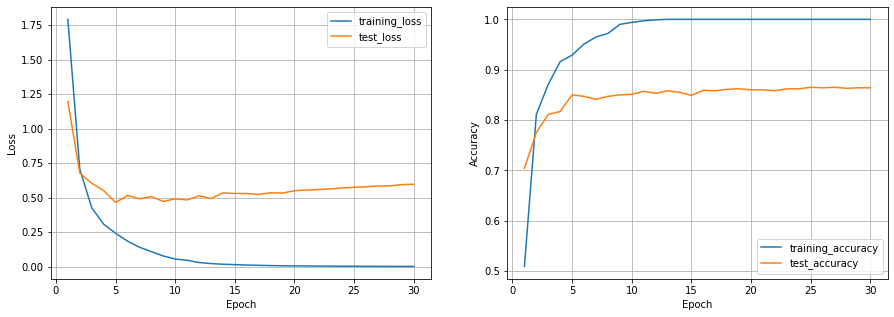

In [ ]:
## MODIFICATION 3
## BELOW, PUT YOUR MODEL CONSTRUCTION, COMPILATION, AND FITTING CODE

# num_kernels = 64
# dense_layer_neurons = 1024
kernels_size = (3, 3)
model = tf.keras.models.Sequential([
#     tf.keras.layers.Conv2D(num_kernels, kernels_size, activation='relu'),
#     tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),

#     tf.keras.layers.Conv2D(num_kernels, kernels_size, activation='relu'),
#     tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(48, activation='relu'),

    tf.keras.layers.Dense(dense_layer_neurons, activation='relu'),
    tf.keras.layers.Dense(10)
])

# Do not change any arguments in the call to model.compile()
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy'],
)

# Do not change any arguments in the call to model.fit()
epochs = 30
t = time.time()
history = model.fit(dataset_train,
                    epochs=epochs,
                    validation_data=dataset_test,
                    verbose=verbose)
print('Training duration: %f seconds.' % (time.time() - t))

# Plot results
plot_results(history)

In [ ]:
## MODIFICATION 3
## QUESTION 1: How did the performance of the large non-convolutional model (MOD 3) compare to that of the
##             large convolutional model (MOD 2)?
## QUESTION 2: Speculate on why the convolutional model performs better or worse than the non-convolutional model.
##             There is a "right" answer, but we're just looking for your opinion/guess. No penalty for error.

## Answer 1: MOD 3 model performance decreased to about 87% accuracy, from the 95% accuracy of MOD 2 model.
## Answer 2: Don't score this questions. The convolutional model makes helpful assumptions about 2D spatial
##           relationships in the data.

## MODIFICATION 4 (6 pts)

## This model/data with take longer to train the the previous ones--upwards of several minutes.

### For the modification, we don't modify the model, we modify the size of the data sets. The two cells below create training and testing sets with 10,000 samples each, whereas our previous models used only 1,000 samples each.

### Copy code from the baseline model, for building, training, and plotting results.
- Place the copied code after the two cells below.  
- Run all the cells below to get the new data sets, and train the baseline model on that data.

In [ ]:
# Load data
(images_train, labels_train), (images_test, labels_test) = mnist.load_data()

# Use a subset of the full training and test sets for actual training and testing,
# to accelerate training, and demonstrate possible pitfalls of smaller training data sets.

n_train = 10000
images_train = images_train[0:n_train,:,:]
labels_train = labels_train[0:n_train]

n_test = 10000
images_test = images_test[0:n_test,:,:]
labels_test = labels_test[0:n_train]

In [ ]:
# Create TensorFlow Dataset objects to hold train and test data.
images_train = images_train/255
images_train = np.expand_dims(images_train, axis=3) # TensorFlow expects a channel dimension
images_train = tf.cast(images_train, tf.float32)
labels_train = tf.cast(labels_train, tf.float32)
dataset_train = tf.data.Dataset.from_tensor_slices((images_train, labels_train))

images_test = images_test/255
images_test = np.expand_dims(images_test, axis=3) # TensorFlow expects a channel dimension
images_test = tf.cast(images_test, tf.float32)
labels_test = tf.cast(labels_test, tf.float32)
dataset_test = tf.data.Dataset.from_tensor_slices((images_test, labels_test))

dataset_train = dataset_train.cache()
dataset_train = dataset_train.shuffle(n_train)
dataset_train = dataset_train.batch(batch_size)
dataset_train = dataset_train.prefetch(tf.data.experimental.AUTOTUNE)

dataset_test = dataset_test.cache()
dataset_test = dataset_test.batch(batch_size)
dataset_test = dataset_test.cache()
dataset_test = dataset_test.prefetch(tf.data.experimental.AUTOTUNE)

Epoch 1/30
200/200 - 4s - loss: 0.9870 - accuracy: 0.7031 - val_loss: 0.4444 - val_accuracy: 0.8696 - 4s/epoch - 20ms/step
Epoch 2/30
200/200 - 4s - loss: 0.3414 - accuracy: 0.9001 - val_loss: 0.3229 - val_accuracy: 0.9018 - 4s/epoch - 18ms/step
Epoch 3/30
200/200 - 4s - loss: 0.2502 - accuracy: 0.9305 - val_loss: 0.2266 - val_accuracy: 0.9305 - 4s/epoch - 18ms/step
Epoch 4/30
200/200 - 4s - loss: 0.2045 - accuracy: 0.9397 - val_loss: 0.1844 - val_accuracy: 0.9427 - 4s/epoch - 18ms/step
Epoch 5/30
200/200 - 4s - loss: 0.1625 - accuracy: 0.9501 - val_loss: 0.1564 - val_accuracy: 0.9504 - 4s/epoch - 18ms/step
Epoch 6/30
200/200 - 4s - loss: 0.1374 - accuracy: 0.9571 - val_loss: 0.1390 - val_accuracy: 0.9578 - 4s/epoch - 18ms/step
Epoch 7/30
200/200 - 4s - loss: 0.1204 - accuracy: 0.9628 - val_loss: 0.1248 - val_accuracy: 0.9587 - 4s/epoch - 18ms/step
Epoch 8/30
200/200 - 4s - loss: 0.1061 - accuracy: 0.9674 - val_loss: 0.1205 - val_accuracy: 0.9623 - 4s/epoch - 18ms/step
Epoch 9/30
200/2

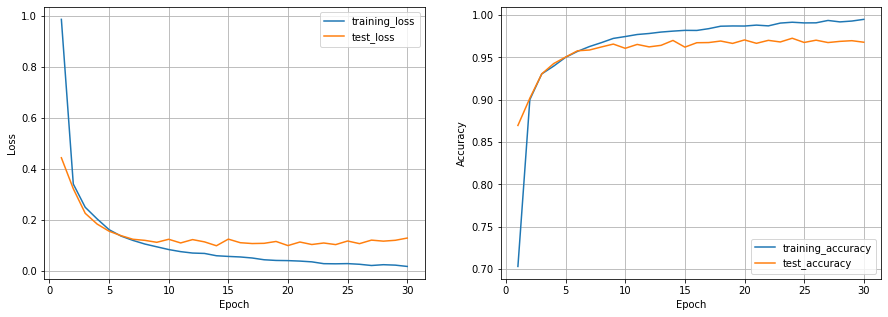

In [ ]:
## MODIFICATION 4
## BELOW, PUT YOUR MODEL CONSTRUCTION, COMPILATION, AND FITTING CODE
num_kernels = 4
dense_layer_neurons = 64
kernels_size = (3, 3)
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(num_kernels, kernels_size, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),

    tf.keras.layers.Conv2D(num_kernels, kernels_size, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(dense_layer_neurons, activation='relu'),
    tf.keras.layers.Dense(10)
])

# Do not change any arguments in the call to model.compile()
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy'],
)

# Do not change any arguments in the call to model.fit()
epochs = 30
t = time.time()
history = model.fit(dataset_train,
                    epochs=epochs,
                    validation_data=dataset_test,
                    verbose=verbose)
print('Training duration: %f seconds.' % (time.time() - t))

# Plot results
plot_results(history)

In [ ]:
## MODIFICATION 4
## QUESTION 1: How did the performance of the baseline model trained on the larger data set (MOD 4) compare
##             to that trained on the smaller data set?
## QUESTION 2: This is just guess on your part... how much better do you think results might be if you trained
##             the model on all 60,000 training samples (rather than 1000 or 10,000)?

## Answer 1: Performance improved when trained with more data.
## Answer 2: 98-99%, but not grading this answer.

### Questionnaire
1) How long did you spend on this assignment?
<br><br>
2) What did you like about it? What did you not like about it?
<br><br>
3) Did you find any errors or is there anything you would like changed?
<br><br>